In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa


import pickle


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install -c conda-forge librosa


In [ ]:
conda install keras


In [ ]:
from sklearn.preprocessing import StandardScaler


**Importing the dataset**

In [5]:
data = pd.read_csv('music_data.csv', index_col=0)
data.head()

,filename,chroma_stft_mean,chroma_stft_var,chroma_stft_std,rms_mean,rms_var,rms_std,spec_cent_mean,spec_cent_var,spec_cent_std,...,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc20_mean,mfcc20_var,label
0,jazz.00000.wav,0.344568,0.085005,0.291555,0.046768,0.001543,0.039282,1504.404759,554635.808130,744.738752,...,13629.358398,-15.305121,11948.286133,-14.216819,10635.010742,-13.059530,9587.314453,-7.565382,4848.609375,jazz
1,jazz.00001.wav,0.328119,0.086557,0.294205,0.022799,0.000239,0.015458,1266.405832,302044.132694,549.585419,...,21481.707031,-20.291924,18852.916016,-18.716410,16783.228516,-16.895838,15139.578125,-9.786606,7651.382812,jazz
2,jazz.00002.wav,0.267640,0.083949,0.289740,0.080840,0.000992,0.031501,1064.810564,161183.061715,401.476104,...,15309.901367,-15.724295,13411.498047,-14.432638,11944.249023,-13.819036,10763.847656,-11.730761,5429.986328,jazz
3,jazz.00003.wav,0.319313,0.081005,0.284614,0.059496,0.001298,0.036026,813.293729,92950.399709,304.877680,...,19610.082031,-10.594538,17201.939453,-10.016613,15303.092773,-9.301682,13786.375000,-5.560663,6943.207031,jazz
4,jazz.00004.wav,0.171782,0.082596,0.287395,0.108786,0.002178,0.046674,1039.623420,122521.889902,350.031270,...,13896.684570,-10.144088,12214.771484,-9.704555,10864.779297,-8.187305,9804.301758,-4.459225,5015.025391,jazz


In [6]:
data.shape

(999, 52)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filename          999 non-null    object 
 1   chroma_stft_mean  999 non-null    float64
 2   chroma_stft_var   999 non-null    float64
 3   chroma_stft_std   999 non-null    float64
 4   rms_mean          999 non-null    float64
 5   rms_var           999 non-null    float64
 6   rms_std           999 non-null    float64
 7   spec_cent_mean    999 non-null    float64
 8   spec_cent_var     999 non-null    float64
 9   spec_cent_std     999 non-null    float64
 10  spec_ban_mean     999 non-null    float64
 11  spec_ban_var      999 non-null    float64
 12  spec_ban_std      999 non-null    float64
 13  spec_cons_mean    999 non-null    float64
 14  spec_cons_var     999 non-null    float64
 15  spec_cons_std     999 non-null    float64
 16  spec_flat_mean    999 non-null    float64
 1

**Checking for missing values**

In [8]:
data[data.isnull().any(axis=1)]


,filename,chroma_stft_mean,chroma_stft_var,chroma_stft_std,rms_mean,rms_var,rms_std,spec_cent_mean,spec_cent_var,spec_cent_std,...,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc20_mean,mfcc20_var,label


<ipython-input-9-146e253d368b>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spec_cent_mean'),
  Text(0, 3.5, 'spec_ban_mean'),
  Text(0, 4.5, 'spec_cons_mean'),
  Text(0, 5.5, 'spec_flat_mean'),
  Text(0, 6.5, 'spec_roll_mean'),
  Text(0, 7.5, 'zero_cros_mean'),
  Text(0, 8.5, 'Beat_mean'),
  Text(0, 9.5, 'mfcc1_mean'),
  Text(0, 10.5, 'mfcc2_mean'),
  Text(0, 11.5, 'mfcc3_mean'),
  Text(0, 12.5, 'mfcc4_mean'),
  Text(0, 13.5, 'mfcc5_mean'),
  Text(0, 14.5, 'mfcc6_mean'),
  Text(0, 15.5, 'mfcc7_mean'),
  Text(0, 16.5, 'mfcc8_mean'),
  Text(0, 17.5, 'mfcc9_mean'),
  Text(0, 18.5, 'mfcc10_mean'),
  Text(0, 19.5, 'mfcc20_mean')])

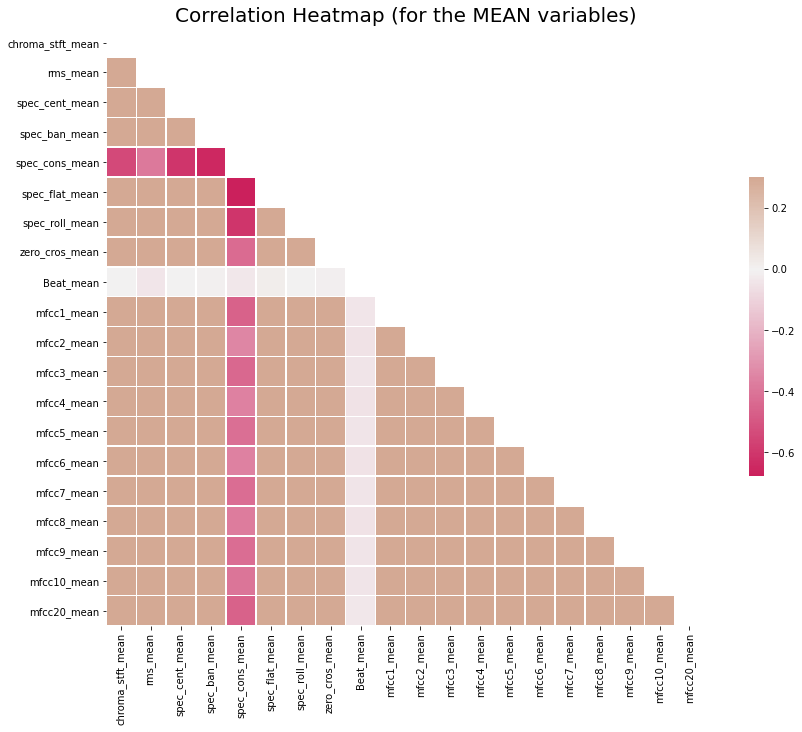

In [9]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

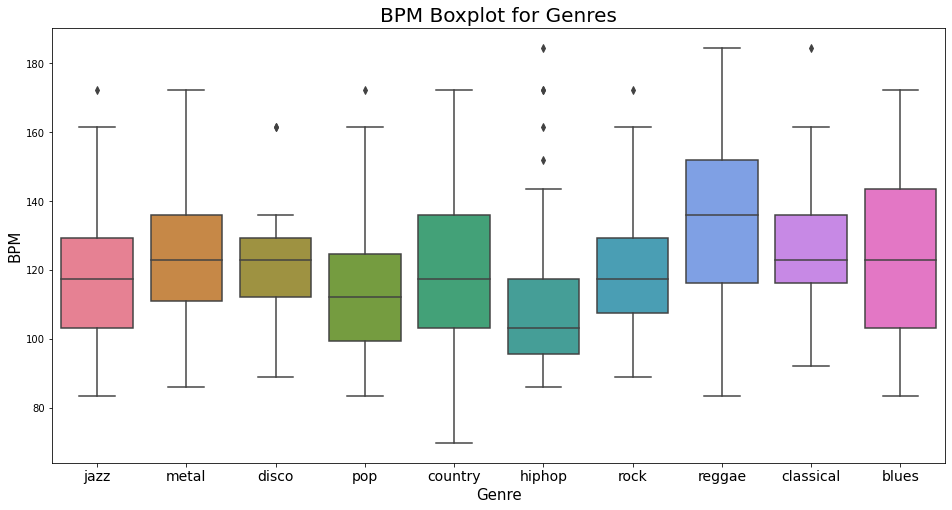

In [10]:
x = data[["label", "Tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "Tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

**Preprocessing**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df = data.copy()

In [13]:
le_label = LabelEncoder()
df['label'] = le_label.fit_transform(df['label'].astype(str))

In [14]:
df.label.value_counts()

0    100
1    100
2    100
3    100
4    100
6    100
7    100
8    100
9    100
5     99
Name: label, dtype: int64

In [15]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [16]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (999, 50)
Shape of y: (999,)


In [17]:
X

array([[ 3.44567657e-01,  8.50045383e-02,  2.91555375e-01, ...,
         9.58731445e+03, -7.56538200e+00,  4.84860938e+03],
       [ 3.28118712e-01,  8.65568370e-02,  2.94205427e-01, ...,
         1.51395781e+04, -9.78660583e+00,  7.65138281e+03],
       [ 2.67640084e-01,  8.39494765e-02,  2.89740354e-01, ...,
         1.07638477e+04, -1.17307606e+01,  5.42998633e+03],
       ...,
       [ 3.75158191e-01,  9.38634574e-02,  3.06371450e-01, ...,
         5.29185840e+03,  1.60071778e+00,  2.73083862e+03],
       [ 4.42972302e-01,  7.82904252e-02,  2.79804260e-01, ...,
         2.74750830e+03,  1.83611107e+00,  1.45823962e+03],
       [ 3.70278656e-01,  8.51674080e-02,  2.91834563e-01, ...,
         6.56261475e+03, -3.38666892e+00,  3.32503125e+03]])

In [18]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
y_train

array([2, 3, 4, 8, 7, 8, 2, 0, 8, 3, 7, 5, 5, 5, 9, 1, 4, 7, 8, 8, 5, 8,
       4, 1, 3, 1, 2, 4, 2, 9, 3, 1, 0, 2, 7, 2, 2, 2, 8, 6, 0, 4, 0, 7,
       1, 2, 5, 3, 9, 3, 6, 6, 4, 7, 7, 2, 6, 2, 3, 0, 5, 0, 5, 8, 1, 4,
       5, 4, 7, 6, 2, 5, 5, 5, 5, 6, 1, 6, 1, 4, 0, 5, 1, 1, 2, 4, 2, 5,
       9, 4, 9, 8, 6, 3, 0, 6, 4, 4, 3, 1, 2, 2, 2, 0, 4, 3, 5, 2, 9, 2,
       0, 4, 0, 2, 5, 3, 8, 6, 6, 0, 3, 3, 0, 4, 7, 5, 5, 1, 5, 3, 1, 7,
       7, 4, 6, 2, 6, 5, 3, 4, 2, 1, 3, 3, 5, 0, 8, 3, 0, 8, 9, 0, 1, 7,
       8, 3, 1, 9, 5, 2, 7, 9, 5, 9, 8, 9, 6, 8, 2, 9, 6, 7, 0, 9, 2, 1,
       7, 2, 7, 3, 3, 3, 7, 7, 7, 5, 4, 6, 1, 8, 7, 4, 6, 1, 3, 9, 3, 3,
       9, 4, 3, 7, 0, 1, 5, 8, 7, 2, 6, 8, 8, 7, 7, 2, 0, 0, 8, 0, 3, 7,
       0, 2, 5, 6, 7, 6, 8, 7, 6, 9, 8, 6, 1, 5, 3, 9, 9, 3, 6, 6, 7, 0,
       6, 7, 8, 1, 1, 0, 1, 2, 2, 9, 6, 9, 6, 8, 9, 3, 2, 2, 9, 8, 3, 9,
       3, 5, 1, 3, 1, 3, 6, 8, 9, 7, 5, 0, 3, 5, 3, 9, 0, 7, 9, 1, 3, 0,
       3, 0, 2, 8, 6, 5, 0, 7, 8, 4, 8, 3, 8, 3, 8,

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.02999063, -0.62245205, -0.59432874, ..., -0.46027606,
        -0.06407223, -0.47022102],
       [ 0.94264002, -2.00285055, -2.03034118, ..., -0.57862539,
         0.42822179, -0.57409126],
       [ 1.01337839,  0.43158128,  0.44052468, ..., -0.27745775,
         0.58319089, -0.29473538],
       ...,
       [ 0.91650239,  0.22278487,  0.23934286, ..., -0.39416418,
        -0.05195148, -0.37760155],
       [ 1.04520721,  0.37246844,  0.38375106, ..., -0.63546893,
         1.06451208, -0.6200398 ],
       [-1.73589913, -0.30074362, -0.27326091, ...,  0.14996482,
        -0.88569278,  0.13827259]])

Testing ML models

In [21]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import catboost as cb

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [23]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [24]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# catboost
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass')
model_assess(cbc,"Cat Boost Classifier")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.46 

Accuracy Stochastic Gradient Descent : 0.56 

Accuracy KNN : 0.49667 

Accuracy Decission trees : 0.49333 

Accuracy Random Forest : 0.60667 

Accuracy Support Vector Machine : 0.56 



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression : 0.65333 

Accuracy Neural Nets : 0.60667 

Accuracy Cat Boost Classifier : 0.64667 

[10:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy Cross Gradient Booster : 0.63667 



C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster (Random Forest) : 0.6 



Testing ANN

In [25]:
from keras.models import Sequential

AttributeError: module 'keras.engine.base_layer' has no attribute 'BaseRandomLayer'

In [ ]:
def train_model(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy', 
                metrics='accuracy')
  return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
def plot_graph(history):
  print("Validation Accuracy", max(history.history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))
  plt.show()

In [ ]:
model = keras.models.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    
    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])
print(model.summary())
model_history = train_model(model=model, epochs=300, optimizer='adam')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("Test loss:", test_loss)
print()
print("Best Accuracy:", test_acc*100)

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

In [ ]:
plot_history(model_history)

In [ ]:
data_smple = data.sample()
data_smple

In [ ]:
pred_val = data_smple.iloc[:,1:-1]
pred_val1 = sc.transform(pred_val)
pred_val1

In [ ]:
preds = model.predict(pred_val1)
predic = np.argmax(preds, axis=1)
predic

In [ ]:
predic1 = int(predic)
result = le_label.inverse_transform([predic1])

In [ ]:
print(result)

saving the artifical neural network model because it performed better.

In [ ]:
model.save("music_model.h5")

In [ ]:
import pickle

cnn_model = {}
cnn_model["label"] = le_label
cnn_model["Standard_Scalar"] = sc

with open("capstone.pkl", "wb") as f:
  pickle.dump(cnn_model, f)

In [ ]:
'chroma_stft_mean', 'chroma_stft_var', 'chroma_stft_std', 'rms_mean', 
                             'rms_var', 'rms_std', 'spec_cent_mean', 'spec_cent_var', 'spec_cent_std', 'spec_ban_mean', 
                             'spec_ban_var', 'spec_ban_std', 'spec_cons_mean', 'spec_cons_var', 'spec_cons_std', 'spec_flat_mean', 
                             'spec_flat_var', 'spec_flat_std', 'spec_roll_mean', 'spec_roll_var', 'spec_roll_std', 'zero_cros_mean', 
                             'zero_cros_var', 'zero_cros_std', 'Tempo', 'Beat_mean', 'Beat_var', 'Beat_std', 
                             'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 
                             'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
                             'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc20_mean', 'mfcc20_var', 'label'))


In [ ]:
def preprocess(file):
  y, sr = librosa.load(file, duration=30)

  #data0 = []
  #defining the Chroma features in the dataframe
  chroma = librosa.feature.chroma_stft(y=y, sr=sr)
  chroma_stft_mean = chroma.mean()#chroma_stft_mean
  chroma_stft_var = chroma.var()#chroma_stft_var
  chroma_stft_std = chroma.std()#chroma_stft_std

  #defining the rms features in the dataframe
  rms = librosa.feature.rms(y=y)
  rms_mean = rms.mean()#rms_mean
  rms_var = rms.var()#rms_var
  rms_std = rms.std()#rms_std

  #defining the spectral centroid features in the dataframe
  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  spec_cent_mean = cent.mean()#spec_cent_mean
  spec_cent_var = cent.var()#spec_cent_var
  spec_cent_std = cent.std()#spec_cent_std

  #defining the spectral bandwidth features in the dataframe
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  spec_ban_mean = spec_bw.mean()#spec_ban_mean
  spec_ban_var = spec_bw.var()#spec_ban_var
  spec_ban_std = spec_bw.std()#spec_ban_std

  #defining the spectral constract features in the dataframe
  S = np.abs(librosa.stft(y))
  contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
  spec_cons_mean = contrast.mean()#spec_cons_mean
  spec_cons_var = contrast.var()#spec_cons_var
  spec_cons_std = contrast.std()#spec_cons_std

  #defining the spectral flatness features in the dataframe
  flatness = librosa.feature.spectral_flatness(y=y)
  spec_flat_mean = flatness.mean()#spec_flat_mean
  spec_flat_var = flatness.var()#spec_flat_var
  spec_flat_std = flatness.std()#spec_flat_std

  #defining the mel frequency cepstrum coefficient features in the dataframe
  mfcc1 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=1)#n_mfcc=1
  mfcc1_mean = mfcc1.mean()#mfcc1_mean
  mfcc1_var = mfcc1.var()#mfcc1_var

  mfcc2 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=2)#n_mfcc=2
  mfcc2_mean = mfcc2.mean()#mfcc2_mean
  mfcc2_var = mfcc2.var()#mfcc2_var

  mfcc3 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=3)#n_mfcc=3
  mfcc3_mean = mfcc3.mean()#mfcc3_mean
  mfcc3_var = mfcc3.var()#mfcc3_var

  mfcc4 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=4)#n_mfcc=4
  mfcc4_mean = mfcc4.mean()#mfcc4_mean
  mfcc4_var = mfcc4.var()#mfcc4_var

  mfcc5 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)#n_mfcc=5
  mfcc5_mean = mfcc5.mean()#mfcc5_mean
  mfcc5_var = mfcc5.var()#mfcc5_var

  mfcc6 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=6)#n_mfcc=6
  mfcc6_mean = mfcc6.mean()#mfcc6_mean
  mfcc6_var = mfcc6.var()#mfcc6_var

  mfcc7 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=7)#n_mfcc=7
  mfcc7_mean = mfcc7.mean()#mfcc7_mean
  mfcc7_var = mfcc7.var()#mfcc7_var

  mfcc8 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=8)#n_mfcc=8
  mfcc8_mean = mfcc8.mean()#mfcc8_mean
  mfcc8_var = mfcc8.var()#mfcc8_var

  mfcc9 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=9)#n_mfcc=9
  mfcc9_mean = mfcc9.mean()#mfcc9_mean
  mfcc9_var = mfcc9.var()#mfcc9_var

  mfcc10 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)#n_mfcc=10
  mfcc10_mean = mfcc10.mean()#mfcc10_mean
  mfcc10_var = mfcc10.var()#mfcc10_var

  mfcc20 = librosa.feature.mfcc(y=y, sr=sr)#n_mfcc=20
  mfcc20_mean = mfcc20.mean()#mfcc20_mean
  mfcc20_var = mfcc20.var()#mfcc20_var

  #defining the spectral roll-off features in the dataframe
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  spec_roll_mean = rolloff.mean()#spec_roll_mean
  spec_roll_var = rolloff.var()#spec_roll_var
  spec_roll_std = rolloff.std()#spec_roll_std

  #defining the zero crossing rate features in the dataframe
  zero_crosing_rate = librosa.feature.zero_crossing_rate(y)
  zero_cros_mean = zero_crosing_rate.mean()#zero_cros_mean
  zero_cros_var = zero_crosing_rate.var()#zero_cros_var
  zero_cros_std = zero_crosing_rate.std()#zero_cros_std

  #defining the Tempo feature in the dataframe
  onset_env = librosa.onset.onset_strength(y=y, sr=sr)
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
  Tempo = tempo.mean()#Tempo

  #defining the Beat feature in the dataframe
  tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
  beat = librosa.frames_to_time(beats, sr=sr)#changing the beats to timestamps
  Beat_mean = beat.mean()#Beat_var
  Beat_var = beat.var()#Beat_var
  Beat_std = beat.std()#Beat_std
      
  data0 = [[chroma_stft_mean, chroma_stft_var, chroma_stft_std, rms_mean, rms_var, rms_std, spec_cent_mean, spec_cent_var, spec_cent_std, 
                 spec_ban_mean, spec_ban_var, spec_ban_std, spec_cons_mean, spec_cons_var, spec_cons_std, 
                 spec_flat_mean, spec_flat_var, spec_flat_std, spec_roll_mean, spec_roll_var, spec_roll_std, 
                 zero_cros_mean, zero_cros_var, zero_cros_std, Tempo, Beat_mean, Beat_var, Beat_std, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, 
                 mfcc3_mean, mfcc3_var, mfcc4_mean, mfcc4_var, mfcc5_mean, mfcc5_var, mfcc6_mean, mfcc6_var, mfcc7_mean, mfcc7_var, mfcc8_mean, mfcc8_var, 
                 mfcc9_mean, mfcc9_var, mfcc10_mean, mfcc10_var, mfcc20_mean, mfcc20_var]]
  #
  return data0

In [ ]:
def predict(data0, sc, model, le_label):
  data0 = sc.transform(data0)
  prediction = model.predict(data0)
  pred = np.argmax(prediction, axis=1)
  pred = int(pred)
  result = le_label.inverse_transform([pred])
  print(result)

In [ ]:
# It can be used to reconstruct the model identically.
l_model = keras.models.load_model("music_model.h5")

In [ ]:
# load the model
with open("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/capstone.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
lle_label = loaded_model["label"]  # label encoder
Standard_Scalar = loaded_model["Standard_Scalar"]  # Standard scalar

In [ ]:
data_new = preprocess("high-stakes-783.mp3")
data_new

In [ ]:
data_new = np.array(data_new)
data_new.shape

In [ ]:
predict(data_new, Standard_Scalar, l_model, lle_label)

In [ ]:
data_2 = preprocess("/content/drive/MyDrive/Colab Notebooks/Stutern Capstone/rubinstein-melody-in-f-remix-harmonica-7403.mp3")
data_2

In [ ]:
data_2 = np.array(data_2)
data_2.shape

In [ ]:
predict(data_2, Standard_Scalar, l_model, lle_label)